In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image

In [19]:
def imageCut(originDir, cuttedDir):
    width_list = list()
    for imageName in os.listdir(originDir):
        img = cv2.imread(originDir+"/" + imageName)
        h, w, c = img.shape
        if not w in width_list:
          width_list.append(w)
        W = int((w * 2)/3)
        H = h
        diff = int((w-W)/2)
        # cuttedImg = img[0:H, 1744:6729]
        # cv2.imwrite(cuttedDir +"/{name}".format(name=imageName), cuttedImg)
    print(width_list)

In [20]:
data_path = "/content/drive/MyDrive/colonoscopic/SNU_datasets/train"
save_path = "/content/drive/MyDrive/colonoscopic/crop_datasets"

wl_path = data_path + "/wl/"
nbi_path = data_path + "/nbi/"


imageCut(data_path+"/wl", save_path + "/wl")
imageCut(data_path+"/nbi", save_path + "/nbi")

[7680, 2880, 2560]
[7680, 2880, 2560]


In [ ]:
# cv2.imshow('image', image)
# # cv2.imshow('image_gray', image_gray)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

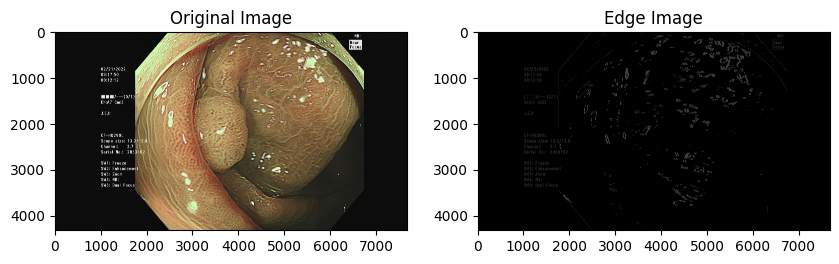

In [ ]:
edged = cv2.Canny(blur, 100, 200)
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# ax[0].set_title('Original Image')
# ax[1].imshow(edged, cmap='gray')
# ax[1].set_title('Edge Image')
# plt.show()

In [ ]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2.imshow('contours_image', contours_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'closed' is not defined

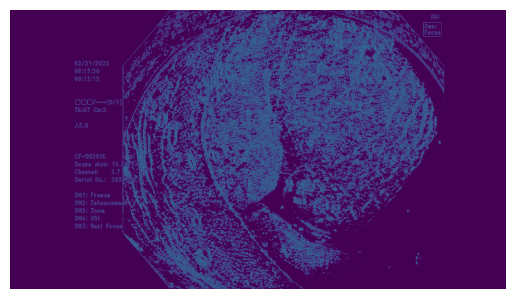

In [ ]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)

# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)
